In [1]:
import csv ## csv 파일 불러오는 파이선 내장 라이브러리
import math ## 수학 연산을 해줄 파이선 내장 라이브러리
import random ## 초기 가중치 생성할 때 필요한 파이선 내장 라이브러리
import matplotlib.pyplot as plt ## 그래프 그려주는 파이선 내장 라이브러리


# 데이터 불러오기 

In [2]:
# data 불러오기
test_data = []
train_data = []
with open('test.csv', 'r') as file :
    reader = csv.reader(file)
    for row in reader:
        test_data.append(list(map(int,row)))
with open('train.csv', 'r') as file :
    reader = csv.reader(file)
    for row in reader:
        train_data.append(list(map(int,row)))        



# 함수 설명  

모든 계산 함수는 호출 전 계산 결과 size만큼 동적 할당을 한 다음에 연산 결과를 받아옴  

1. zeros  
행렬을 생성할 때 행렬의 내부 값들을 모두 0으로 한다.  

2. randn  
정규 분포 난수를 생성하는 함수이다. 가중치를 초기화할 떄 사용한다.  

3. randnArray  
위의 randn 함수를 호출해 정규 분포 난수로 이루어진 행렬을 반환  

4. divide_matrix  
행렬을 요소 별로 주어진 값으로 나눔  

5. mul_matrix  
행렬을 요소 별로 주어진 값으로 곱함  

6. add_matrix  
행렬을 요소 별로 주어진 값으로 더함  

7. dot_product  
a x b * b x c 행렬이 들어오면  내적 연산을 해 => a x c 사이즈의 행렬을 반환  

8. sigmoid  
output layer에서 시그모이드 활성화 함수 적용  

9. relu
hidden layer에서 relu 활성화 함수 적용  

10. softmax  
output layer에서 softmax 활성화 함수 적용
class 많을 때는 sigmoid보다 성능이 좋다.  
softmax를 사용할 것임  

11. log  
행렬의 각 요소에 log를 취해줌  

12. elementwise_mul   
두 행렬을 받으면 행렬의 요소끼리 곱해서 반환해 줌  

13. elementwise_minus  
두 행렬을 받으면 행렬의 앞 행렬의 값에서 뒤 행렬의 값을 빼서 반환해 줌    

14. elementwise_add  
두 행렬을 받으면 행렬의 요소끼리 더해서 반환해 줌  

15. matrix_minus_from_one  
행렬의 요소를 1에서 빼는 함수 cross entropy loss 계산 시 사용  

16. sum  
행렬을 받으면 요소끼리 전부 더 해서 반환해 줌  

17. matrix_transpose  
행렬 전치 함수 (행과 열을 바꿈)  
전치된 행렬의 행과 열 수는 원본 행렬의 열과 행 수와 같음  

18. relu_back  
역전파 단계에서 relu의 편미분 값을 구함  

19. find_max_index  
one hot encoding된 class에서 가장 큰 값이 예측한 정답값임  
가장 큰 값이 무엇인지 반환함  

20. vector_transpose  
벡터 전치 함수  

In [3]:
# shape은 원하는 배열의 모양 (예: (3, 4)는 3x4 배열을 의미) 입력 tuple로 줘야함
# zeros 함수는 shape에 맞는 0으로 채워진 배열을 반환
def zeros(shape):
    
    if len(shape) == 1:
        return [0] * shape[0]
    else:
        return [zeros(shape[1:]) for _ in range(shape[0])]

# 정규 분포 난수 생성 함수
def randn(shape): # 평균 0 표준편차 1 정규분포
    if len(shape) == 0:
        return random.gauss(0, 1)
    else:
        return [randn(shape[1:]) for _ in range(shape[0])]

# 균등 분포 난수 생성 함수
def rand(shape): # 0~1 사이의 균등분포
    if len(shape) == 1:
        return [random.random() for _ in range(shape[0])]
    else:
        return [rand(shape[1:]) for _ in range(shape[0])]
    
# 행렬을 주어진 값으로 나누는 함수
def divide_matrix(matrix, value):
    result = []
    for row in matrix:
        new_row = []
        for element in row:
            new_row.append(element / value)
        result.append(new_row)
    return result

# 행렬을 주어진 값으로 곱하는 함수
def mul_matrix(matrix, value):
    result = []
    for row in matrix:
        new_row = []
        for element in row:
            new_row.append(element * value)
        result.append(new_row)
    return result

# a x b * b x c 행렬이 들어오면  내적 연산을 해 => a x c 사이즈의 행렬을 반환
def dot_product(matrix1, matrix2):

    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            product = 0
            for k in range(len(matrix2)):
                product += matrix1[i][k] * matrix2[k][j]
            row.append(product)
        result.append(row)
    return result

# 시그모이드 활성화 함수
def sigmoid(vector):
    result = []
    row = []
    for i in range(len(vector[0])) :
        row.append(1/(1+math.exp(-1*vector[0][i])))
    result.append(row)
    return result

# relu 활성화 함수
def relu(vector):
    result = []
    row = []
    for i in range(len(vector[0])) :
        if vector[0][i] >0 : 
            row.append(vector[0][i])
        else :
            row.append(0)
    result.append(row)
    return result

# soft max 활성화 함수
def softmax(vector):
    result = []
    max_value = vector[0][(find_max_index(vector))]
    row = []
    sum_row = 0
    for i in range(len(vector[0])) :
        row.append(math.exp(vector[0][i]-max_value))
    
    for i in row :
        sum_row += i
        
    for i in range(len(vector[0])) :
        row[i] = row[i]/sum_row
    result.append(row)
    return result

# 행렬의 각 요소에 log 취하는 함수
def log(vector):
    result = []
    row = []
    for i in range(len(vector[0])) :
        row.append(math.log(vector[0][i]))
    result.append(row)
    return result 

# 행렬을 주어진 값으로 더하는 함수
def add_matrix(matrix, value):
    result = []
    for row in matrix:
        new_row = [element + value for element in row]
        result.append(new_row)
    return result

# 행렬의 요소끼리 곱하는 함수
def elementwise_mul(matrix1, matrix2):
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix1[0])):
            row.append(matrix1[i][j] * matrix2[i][j])
        result.append(row)
    return result

# 1에서 행렬의 각 원소를 뺀 함수
def matrix_minus_from_one(matrix) :
    result = []
    for row in matrix:
        new_row = [1 - element  for element in row]
        result.append(new_row)
    return result

# 행렬의 요소끼리 더하는 함수
def elementwise_add(matrix1, matrix2):
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix1[0])):
            row.append(matrix1[i][j] + matrix2[i][j])
        result.append(row)
    return result

# 행렬의 요소끼리 빼는 함수
def elementwise_minus(matrix1, matrix2):
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix1[0])):
            row.append(matrix1[i][j] - matrix2[i][j])
        result.append(row)
    return result

# 벡터의 합 함수
def sum(vector) :
    result = 0
    for i in range(len(vector[0])):
        result += vector[0][i] 
    return result

# 벡터의 전치 함수
def vector_transpose(vector) :
    result =[]
    for i in range(len(vector[0])):
        result.append([vector[0][i]])
    return result

# 행렬 전치 함수 (행과 열을 바꿈)
# 전치된 행렬의 행과 열 수는 원본 행렬의 열과 행 수와 같음
def matrix_transpose(matrix):
    # 원본 행렬의 행과 열 크기 구하기
    num_rows = len(matrix)
    num_cols = len(matrix[0])
    # 전치된 행렬의 초기화
    result = [[0 for _ in range(num_rows)] for _ in range(num_cols)]
    # 전치 작업 수행
    for i in range(num_rows):
        for j in range(num_cols):
            result[j][i] = matrix[i][j]

    return result

# 행렬의 열에서 가장 큰 값의 인덱스를 구하는 함수
def find_max_index(vector):
    max_index = 0
    max_value = vector[0][0]
    for i in range(1, len(vector[0])):
        if vector[0][i] > max_value:
            max_index = i
            max_value = vector[0][i]
    return max_index

# relu 함수의 역전파 함수
def relu_back(matrix):
    result = []
    row = []
    for i in range(len(matrix[0])) :
        if matrix[0][i] > 0 : 
            row.append(1)
        else :
            row.append(0)
    result.append(row)
    return result

# init 
w2(input_nodes, hidden_nodes)  
w3(hidden_nodes, second_hidden_nodes)  
w4(second_hidden_nodes, output_nodes)  

b2(1, hidden_nodes)  
b3(1, second_hidden_nodes)  
b4(1, output_nodes)

z1(1,input_nodes)  
a1(1,input_nodes)  

z2(1,hidden_nodes)    
a2(1,hidden_nodes)  

z3(1,second_hidden_nodes)  
a3(1,second_hidden_nodes)  

z4(1,output_nodes)    
a4(1,output_nodes)  

가중치의 경우 he initalization을 통해 초기화를 함  

정규 분포의 난수로 이루어진 것을 입력에 제곱근을 씌워준 것으로 나누는 xavier inialization에 2를 곱해준 형태임  

편향은 0~1 난수로 만듬  

# forward propagation 구현  

1. input layer  
(1, input_nodes)a1, z1 = input data

2. first hidden layer  
w2(input_nodes, hidden_nodes) -> 내적으로 결과 shape (1, hidden_nodes)로 변경  
편향을 더해줌  
(1, hidden_nodes)z2 = a1 * w2 + b2   
(1, hidden_nodes)a2 = relu(z2)  

3. second hidden layer  
w3(hidden_nodes, second_hidden_nodes) -> 내적으로 결과 shape (1, second_hidden_nodes)로 변경  
편향을 더해줌  
(1, second_hidden_nodes)z3 = a2 * w3 + b3  
(1, second_hidden_nodes)a3 = relu(z3)  

4. output layer  
w3(second_hidden_nodes, output_nodes) -> 내적으로 결과 shape (1, output_nodes)로 변경  
편향을 더해줌  
(1, output_nodes)z4 = a3 * w4 + b4  
(1, output_nodes)a4 = softmax(z4) 

5. loss 계산   

나온 예측 a4와 정답 값 target_data를 이용해 cross entropy loss 적용  

6. loss 반환  
계산된 loss 반환  

# backward propagation 구현  

1. forward 함수 호출해 우선 forward 진행  

2. output layer 계층 역전파  
loss4 = dl/dz4를 구함  
loss4 = (a4 - target_data) = dl/da4 * da4/dz4 = dl/dz4  
z4 = w4 * a3 + b4 -> dz4/dw4 = a3  
연산을 위해 a3 transpose    

w4 업데이트  
dw4 = a3_T * loss4  = dl/dz4 * dz4/dw4 = dl/dw4  
dw4 = dl/dw4 * learning_rate  
w4 = w4 - dw4  

b4 업데이트  
db4 = dl/dz4 * dz4/db4 = dl/db4, dl/db4 = 1  
db4 = dl/db4 * learning_rate 
b4 = b4 - db4  

3. second hidden layer 계층 역전파  
loss3 = dl/dz3를 구함  
z4 = w4 * a3 + b4 -> dz4/da3 = w4  
계산을 위해 w4 transpose  
loss3 = dl/dz4 * dz4/da3 = dl/da3 * da3/dz3= loss4 * w4_T * relu_back(a3)  

z3 = w3 * a2 + b3 -> dz3/dw3 = a2  
연산을 위해 a2 transpose   

w3 업데이트  
dw3 = a2_T * loss3  = dl/dz3 * dz3/dw3 = dl/dw3  
dw3 = dl/dw3 * learning_rate  
w3 = w3 - dw3  

b3 업데이트  
db3 = dl/dz3 * dz3/db3 = dl/db3, dl/db3 = 1  
db3 = dl/db3 * learning_rate 
b3 = b3 - db3  

4. hidden layer 계층 역전파  
loss2 = dl/dz2를 구함  
z3 = w3 * a2 + b3 -> dz3/da2 = w3  
계산을 위해 w3 transpose  
loss2 = dl/dz3 * dz3/da2 = dl/da2 * da2/dz2 = loss3 * w3_T * relu_back(a2)  

z2 = w2 * a1 + b2 -> dz2/dw2 = a1  
연산을 위해 a1 transpose    

w2 업데이트  
dw2 = a2_T * loss2  = dl/dz2 * dz2/dw2 = dl/dw2  
dw2 = dl/dw2 * learning_rate  
w2 = w2 - dw2  

b2 업데이트  
db2 = dl/dz2 * dz2/db2 = dl/db2, dl/db2 = 1  
db2 = dl/db2 * learning_rate 
b2 = b2 - db2  


# Predict 함수  

테스트 데이터를 하나 받아와 학습된 가중치로 forward 진행한 뒤  
output layer 결과 값 중 가장 큰 값의 index를 반환함  
가장 큰 값은 one hot encoding에서 예측한 정답을 의미함  
{0:t, 1:u, 2:v, 3:w, 4:x, 5:y, 6:z}  

# accuracy 함수  
받아온 test data를 0.01 ~ 1.0의 값을 가지게끔 정규화를 한 뒤에  
predict 함수를 통해 예측을 진행함  
정답 라벨링 값과 예측한 값이 같으면 cnt를 1 더 해주고  
모든 test data에 대해 같은 과정을 진행한 뒤 총 정확도를 출력함  

In [4]:
class NeuralNetwork :
    
    def __init__(self, input_nodes, hidden_nodes, second_hidden_nodes,output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.second_hidden_nodes = second_hidden_nodes
        self.output_nodes = output_nodes
        
        # he 초기화 
        # xavier 초기화에 2를 곱해줌    
        # first hidden_layer 가중치 W2 = (input_nodes x hidden_nodes) 
        self.W2 = divide_matrix(randn((self.input_nodes,self.hidden_nodes)), math.sqrt(self.input_nodes/2))
        self.b2 = rand((1,self.hidden_nodes))
        
        # second hidden_layer 가중치 W3 = (hidden_nodes x second_hidden_nodes) 
        self.W3 = divide_matrix(randn((self.hidden_nodes,self.second_hidden_nodes)),math.sqrt(self.hidden_nodes/2))
        self.b3 = rand((1,self.second_hidden_nodes))
        
        
        # output_layer 가중치 W4 = (second_Hidden_nodes x output_nodes) 
        self.W4 = divide_matrix(randn((self.second_hidden_nodes,self.output_nodes)),math.sqrt(self.second_hidden_nodes/2))
        self.b4 = rand((1,self.output_nodes))
        
        
        # input_layer Z1, A1 선언
        self.Z1 = zeros((1,self.input_nodes))
        self.A1 = zeros((1,self.input_nodes))
        
        # first hidden_layer z2, A2 선언
        self.Z2 = zeros((1,self.hidden_nodes))
        self.A2 = zeros((1,self.hidden_nodes))
        
        # second hidden_layer z3, A3 선언
        self.Z3 = zeros((1,self.second_hidden_nodes))
        self.A3 = zeros((1,self.second_hidden_nodes))
        
        # output_layer z4, A4 선언
        self.Z4 = zeros((1,self.output_nodes))
        self.A4 = zeros((1,self.output_nodes))
        
        
        # learning rate 초기화
        self.learning_rate = learning_rate
    
    def forward(self):
        
        delta = 1e-7 # log 무한대 발산 방지
        
        # input_layer z1, A1 넣기
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # first hidden_layer z2, A2 넣기
        # z2 = a1 * w2 + b2
        # a2 = relu(z2) 
        self.Z2 = elementwise_add(dot_product(self.A1,self.W2),self.b2)
        self.A2 = relu(self.Z2)
        
        
        # second hidden_layer z3, A3 넣기
        # z3 = a2 * w3 + b3
        # a3 = relu(z3)
        self.Z3 = elementwise_add(dot_product(self.A2,self.W3),self.b3)
        self.A3 = relu(self.Z3)
        
        # output_layer z4, A4 넣기
        # z4 = a3 * w4 + b4
        # a4 = softmax(z4)
        self.Z4 = elementwise_add(dot_product(self.A3,self.W4),self.b4)
        self.A4 = softmax(self.Z4)
        
        # cross entropy loss
        result1 = elementwise_mul(self.target_data, log(add_matrix(self.A4,delta)))
        result2 = elementwise_mul(matrix_minus_from_one(self.target_data), log(add_matrix(matrix_minus_from_one(self.A4),delta)))
        result = elementwise_add(result1,result2)
        return -sum(result)
    
    def train(self, input_data, target_data) :
        self.target_data = target_data
        self.input_data = input_data
        
        # forward 진행 
        loss_result = self.forward()
        
        # backward 진행
        # loss4 = (a4 - target_data) = dl/da4 * da4/dz4 = dl/dz4
        loss4 = elementwise_minus(self.A4,self.target_data)
        
        #output_layer 가중치 W4, 편향 b4 업데이트
        # z4 = w4 * a3 + b4 -> dz4/dw4 = a3
        # 계산을 하기 위해 a3_T로 변환
        # dw4 = a3_T * loss4 = dl/dz4 * dz4/dw4 = dl/dw4
        # dw4 = dl/dw4 * learning_rate 
        # w4 = w4 - dw4
        self.W4 = elementwise_minus(self.W4 , mul_matrix(dot_product(vector_transpose(self.A3),loss4),self.learning_rate))
        
        # db4 = dl/dz4 * dz4/db4 = dl/db4, dl/db4 = 1
        # db4 = dl/db4 * learning_rate
        # b4 = b4 - db4
        self.b4 = elementwise_minus(self.b4 , mul_matrix(loss4,self.learning_rate) )
        
        # z4 = w4 * a3 + b4 -> dz4/da3 = w4
        # 계산을 하기 위해 w4_T로 변환
        # loss3 = dl/da3 * da3/dz3 = dl/dz3 = loss4 * w4_T * relu_back(a3)
        loss3 = elementwise_mul(dot_product(loss4,matrix_transpose(self.W4)) ,relu_back(self.A3)) 
        
        #second hidden_layer 가중치 W3, 바이어스 b3 업데이트
        # z3 = w3 * a2 + b3 -> dz3/dw3 = a2
        # 계산을 하기 위해 a2_T로 변환
        # dw3 = a2_T * loss3 = dl/dz3 * dz3/dw3 = dl/dw3
        # dw3 = dl/dw3 * learning_rate
        # w3 = w3 - dw3
        self.W3 = elementwise_minus(self.W3 , mul_matrix(dot_product(vector_transpose(self.A2),loss3),self.learning_rate))
        
        # db3 = dl/dz3 * dz3/db3 = dl/db3, dl/db3 = 1
        # db3 = dl/db3 * learning_rate
        # b3 = b3 - db3
        self.b3 = elementwise_minus(self.b3 , mul_matrix(loss3,self.learning_rate) )
        
        # z3 = w3 * a2 + b3 -> dz3/da2 = w3
        # 계산을 하기 위해 w3_T로 변환
        # loss2 = dl/da2 * da2/dz2 = dl/dz2 = loss3 * w3_T * relu_back(a2)
        loss2 = elementwise_mul(dot_product(loss3,matrix_transpose(self.W3)) ,relu_back(self.A2))
        
        #first hidden_layer 가중치 W2, 바이어스 b2 업데이트
        # z2 = w2 * a1 + b2 -> dz2/dw2 = a1
        # 계산을 하기 위해 a1_T로 변환
        # dw2 = a1_T * loss2 = dl/dz2 * dz2/dw2 = dl/dw2
        # dw2 = dl/dw2 * learning_rate
        # w2 = w2 - dw2
        self.W2 = elementwise_minus(self.W2 , mul_matrix(dot_product(vector_transpose(self.A1),loss2),self.learning_rate))
        
        # db2 = dl/dz2 * dz2/db2 = dl/db2, dl/db2 = 1
        # db2 = dl/db2 * learning_rate
        # b2 = b2 - db2
        self.b2 = elementwise_minus(self.b2 , mul_matrix(loss2,self.learning_rate) )
        
        return loss_result
        
    def predict(self, input_data) :
        
        # forward 구조와 동일
        Z2 = elementwise_add(dot_product(input_data, self.W2),self.b2) 
        A2 = relu(Z2)
        
        Z3 = elementwise_add(dot_product(A2, self.W3),self.b3) 
        A3 = relu(Z3)
        
        Z4 = elementwise_add(dot_product(A3, self.W4),self.b4) 
        A4 = softmax(Z4)
        
        # A4에서 가장 큰 값의 인덱스를 구함
        predicted_num = find_max_index(A4)
        
        return predicted_num
    
    def accuracy(self, test_data):
        
        matched_list = []
        not_matched_list = []
        predicted_num_list = []
        label_list = []
        # test data 140개를 predict 함수를 통해 예측한 값과 label이 같으면 count를 증가시킴
        for index in range(len(test_data)) :
            label = int(test_data[index][256])
            data = []
            row = []
            for i in range(0,256):
                row.append(((test_data[index][i]/255.0)*0.99)+0.01)
            data.append(row)
            
            predicted_num = self.predict(data)
            
            if label == predicted_num:
                matched_list.append(index+1)
            else:
                not_matched_list.append(index+1)
                predicted_num_list.append(predicted_num)
                label_list.append(label)
        print("Count",len(matched_list) ,"Current Accuracy = ", 100*(len(matched_list)/len(test_data)), " %")
        
        return not_matched_list,predicted_num_list,label_list, 100*(len(matched_list)/len(test_data))


# main 함수  

train data 파일 315개 test data 파일 140개를 받아옴  
라벨을 기준으로 class마다 one hot encoding을 해준 뒤  
정규화된 학습 데이터로 epochs만큼 학습을 함  
50번마다 loss를 출력하고 학습이 끝날 때마다 정확도를 출력함  
마지막에 hyper parameter들을 출력하고 그래프도 출력함  

In [5]:
def main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs):
    nn = NeuralNetwork(input_nodes,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate)
    accuracys = []
    loss_results = []
    for i in range(epochs) :
        
        for step in range(len(train_data)):
            
            #학습데이터 정규화 및 라벨링
            target_data = add_matrix(zeros((1,output_nodes)), 0.01)
            target_data[0][train_data[step][256]] =0.99
            input_data = []
            row = []
            for j in range(0,256):
                row.append(((train_data[step][j]/255.0)*0.99)+0.01)
            input_data.append(row)
            loss_result = nn.train(input_data,target_data)
            if step % 50 ==0 :
                print("epochs = ",i,end=' ')
                print(" step = ",step, ", loss_val =", loss_result)
        not_matched_result, predicted_num_list, label_list, accuracy= nn.accuracy(test_data)
        accuracys.append(accuracy)
        loss_results.append(loss_result)
        
        print("not matched sample = ", not_matched_result)
        print("predicted number = ", predicted_num_list)
        print("actual label = ", label_list)
        
    print("hidden_nodes = ",hidden_nodes, "second_hidden_nodes = ",second_hidden_nodes, "learning_rate = ",learning_rate, "epochs = ",epochs)
    
    
    x_values = range(1,epochs+1)

    plt.plot(x_values, accuracys, label='accuracy')

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('accuracy graph')

    plt.show()

    plt.plot(x_values, loss_results, label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('loss graph')
    
    

초기 랜덤 생성된 가중치에 따라 새로 실행한 결과와 아래 작성된 리포트의 결과가 다를 수 있습니다.  
실험의 목표는 적절한 속도 그리고 초기 생성된 가중치에 덜 영향을 받고 오버피팅 지점에 빠지지 않는 하이퍼 파라미터를 찾는 것입니다.

초기 하이퍼파라미터로 실행한 결과

epochs =  0  step =  0 , loss_val = 4.512568062236566
epochs =  0  step =  50 , loss_val = 3.407170724229673
epochs =  0  step =  100 , loss_val = 2.5518199861039403
epochs =  0  step =  150 , loss_val = 3.3244914738972335
epochs =  0  step =  200 , loss_val = 3.2631080093357534
epochs =  0  step =  250 , loss_val = 2.7681454123481437
epochs =  0  step =  300 , loss_val = 2.926209213711928
Count 37 Current Accuracy =  26.42857142857143  %
not matched sample =  [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 64, 65, 68, 71, 72, 74, 75, 76, 78, 79, 82, 85, 86, 88, 89, 90, 92, 93, 96, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 131, 133, 134, 135, 137, 138, 139, 140]
predicted number =  [5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 2, 0, 6, 5, 5, 5, 5, 3, 0, 6, 6, 5, 5, 2, 0, 6

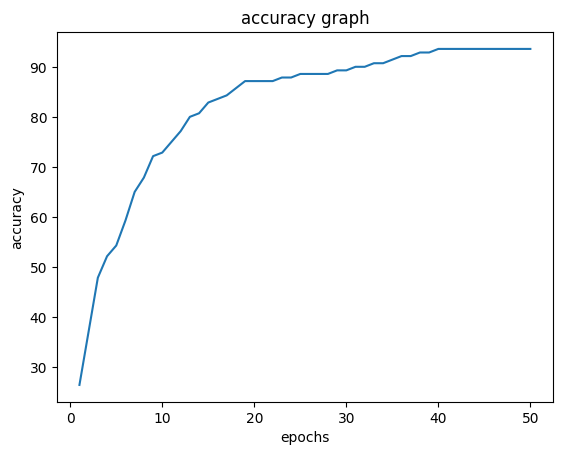

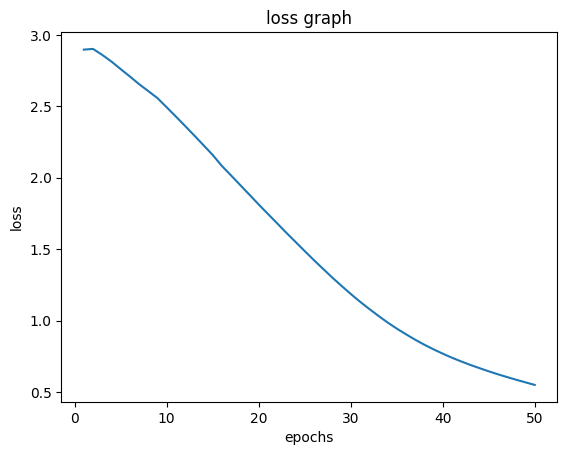

In [6]:
#hyper parameter
input_nodes = 256 # 16 * 16
hidden_nodes = 80
second_hidden_nodes = 40
output_nodes = 7 #t, u, v, w, x, y, z 
learning_rate = 0.001
epochs = 50

main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs)

레이어의 수를 절반으로 하고 다시 실행한 결과

epochs =  0  step =  0 , loss_val = 5.333335625083428
epochs =  0  step =  50 , loss_val = 2.766174089143269
epochs =  0  step =  100 , loss_val = 2.5457669702566554
epochs =  0  step =  150 , loss_val = 5.3442878724773255
epochs =  0  step =  200 , loss_val = 2.2280954118540546
epochs =  0  step =  250 , loss_val = 3.5172616059222337
epochs =  0  step =  300 , loss_val = 3.5621955813442923
Count 15 Current Accuracy =  10.714285714285714  %
not matched sample =  [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
pr

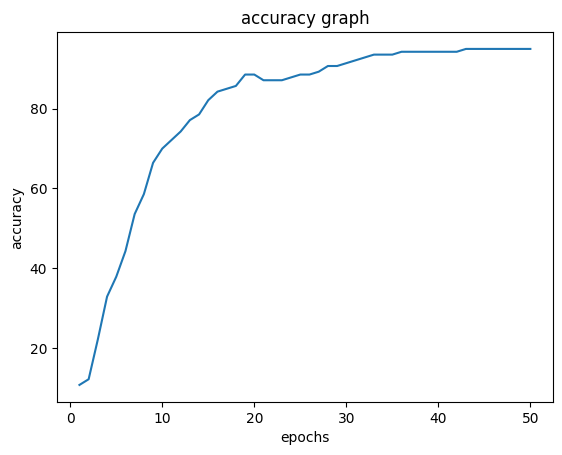

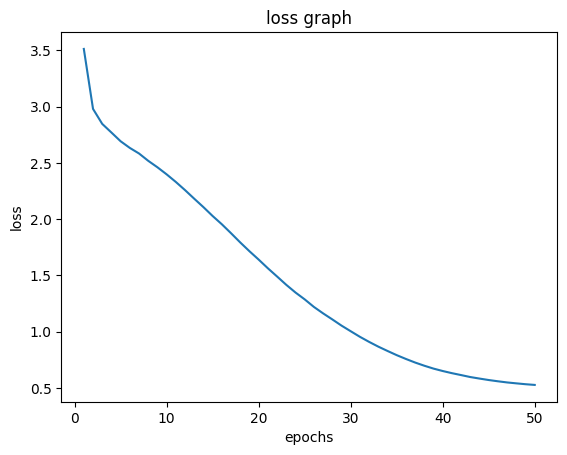

In [9]:
#hyper parameter
input_nodes = 256 # 16 * 16
hidden_nodes = 40
second_hidden_nodes = 20
output_nodes = 7 #t, u, v, w, x, y, z 
learning_rate = 0.001
epochs = 50

main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs)

레이어의 수를 초기 파라미터에서 2배로 한 뒤 실행한 결과

epochs =  0  step =  0 , loss_val = 3.0238641911565978
epochs =  0  step =  50 , loss_val = 2.325070913574748
epochs =  0  step =  100 , loss_val = 3.1387741513571825
epochs =  0  step =  150 , loss_val = 2.833029937471577
epochs =  0  step =  200 , loss_val = 3.228572651378192
epochs =  0  step =  250 , loss_val = 2.826189740728377
epochs =  0  step =  300 , loss_val = 2.9989200306056123
Count 21 Current Accuracy =  15.0  %
not matched sample =  [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 122, 123, 124, 125, 127, 129, 131, 133, 134, 136, 138, 139]
predicted number =  [4, 6, 5, 6, 6, 6, 4, 4, 5, 6, 

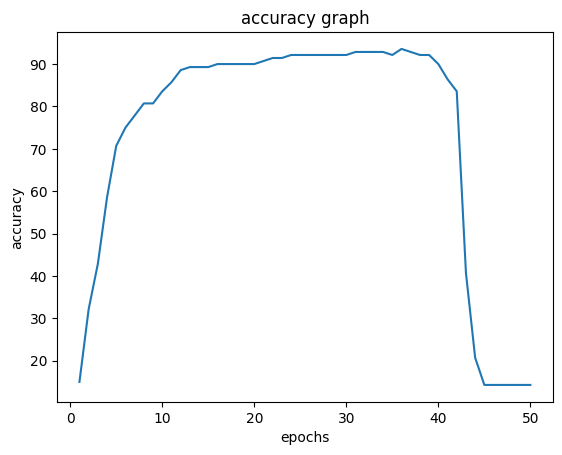

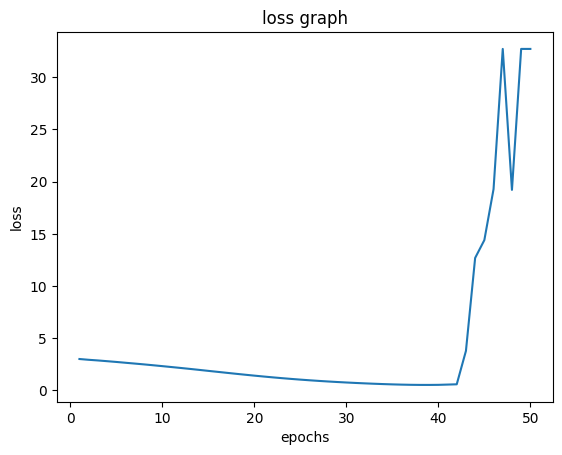

In [8]:
#hyper parameter
input_nodes = 256 # 16 * 16
hidden_nodes = 160
second_hidden_nodes = 80
output_nodes = 7 #t, u, v, w, x, y, z 
learning_rate = 0.001
epochs = 50

main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs)

오버피팅이 된 모습을 확인 할 수 있다.  
레이어의 수를 많이 한다고 해서 학습이 무조건 잘 되는 것을 보장할 수 없음을 알았고  
또 시간이 너무 오래 걸린다는 것을 알 수 있었다.  

레이어의 수를 2배 낮춘 것에서 10 더 낮추어서 진행해 보았다. 

epochs =  0  step =  0 , loss_val = 4.982879238716733
epochs =  0  step =  50 , loss_val = 2.6702877194972476
epochs =  0  step =  100 , loss_val = 3.403652172529251
epochs =  0  step =  150 , loss_val = 2.4015321053865777
epochs =  0  step =  200 , loss_val = 3.3155115836119378
epochs =  0  step =  250 , loss_val = 2.8212342489612365
epochs =  0  step =  300 , loss_val = 3.062448433821654
Count 19 Current Accuracy =  13.571428571428571  %
not matched sample =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 69, 70, 71, 73, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140]
predicted number =  [

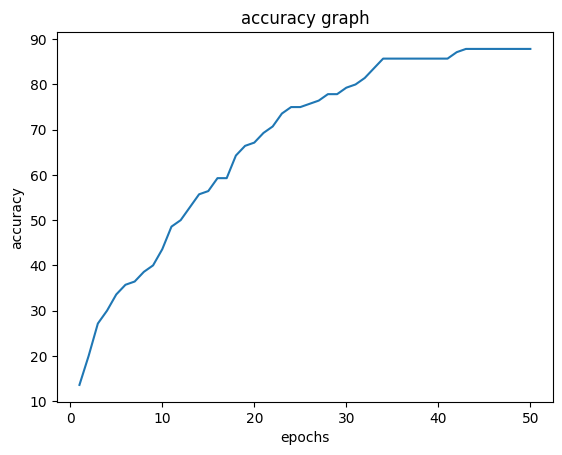

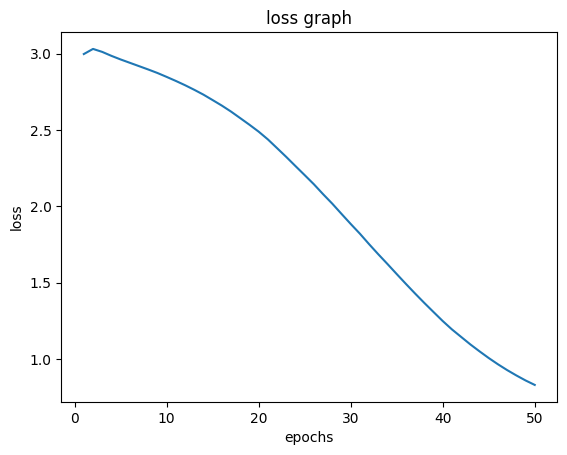

In [10]:
#hyper parameter
input_nodes = 256 # 16 * 16
hidden_nodes = 30
second_hidden_nodes = 10
output_nodes = 7 #t, u, v, w, x, y, z 
learning_rate = 0.001
epochs = 50

main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs)

학습이 다소 느린 것을 확인 할 수 있었고  
학습횟수를 2배로 늘리고 다시 실행해 보았다.  

epochs =  0  step =  0 , loss_val = 5.237278902217862
epochs =  0  step =  50 , loss_val = 0.8339652549869364
epochs =  0  step =  100 , loss_val = 3.3239973338279327
epochs =  0  step =  150 , loss_val = 3.5759419452685006
epochs =  0  step =  200 , loss_val = 3.431173981066105
epochs =  0  step =  250 , loss_val = 3.055949798715329
epochs =  0  step =  300 , loss_val = 2.6435111291350264
Count 31 Current Accuracy =  22.142857142857142  %
not matched sample =  [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 64, 66, 67, 68, 69, 71, 73, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 94, 95, 96, 97, 99, 101, 102, 103, 104, 106, 108, 109, 110, 111, 113, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140]
predicted number =  [6, 6, 1, 6, 1, 1, 1, 5, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1,

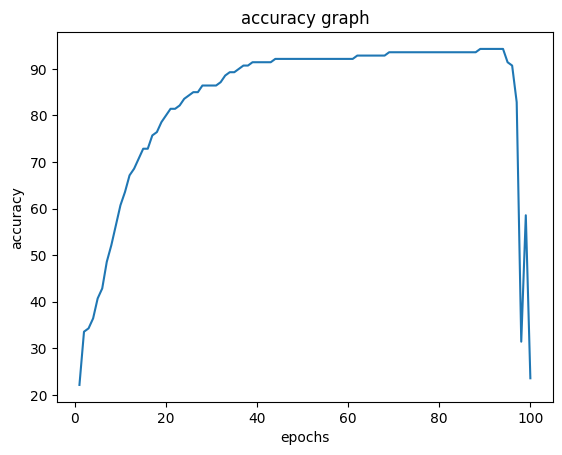

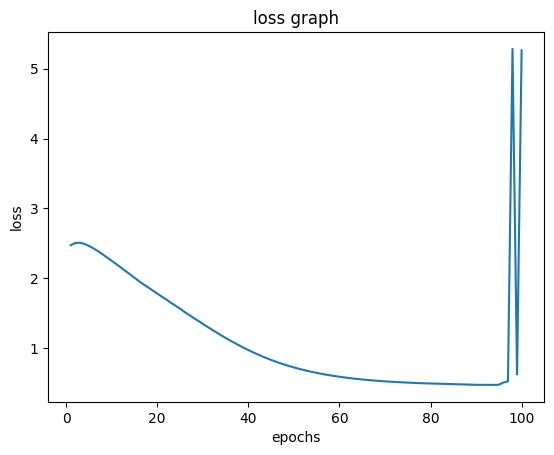

In [15]:
#hyper parameter
input_nodes = 256 # 16 * 16
hidden_nodes = 30
second_hidden_nodes = 10
output_nodes = 7 #t, u, v, w, x, y, z 
learning_rate = 0.001
epochs = 100

main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs)

90 에폭 지점에서 오버피팅이 되는 것을 확인할 수 있었다.  

에폭을 절반으로 줄이고 학습율을 2배로 해서 다시 실험을 진행해 보았다.  

epochs =  0  step =  0 , loss_val = 3.1481652328432865
epochs =  0  step =  50 , loss_val = 3.0925625809389308
epochs =  0  step =  100 , loss_val = 3.0192524354972448
epochs =  0  step =  150 , loss_val = 4.029685065731044
epochs =  0  step =  200 , loss_val = 3.2930657200968265
epochs =  0  step =  250 , loss_val = 2.6274770003382315
epochs =  0  step =  300 , loss_val = 2.7093408176938674
Count 33 Current Accuracy =  23.57142857142857  %
not matched sample =  [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19, 23, 24, 25, 26, 27, 28, 30, 31, 32, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 86, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139]
predicted number =  [6, 5, 6, 5, 6, 0, 6, 6, 6, 6, 0, 6, 5, 6, 5, 0, 6, 0, 5, 4,

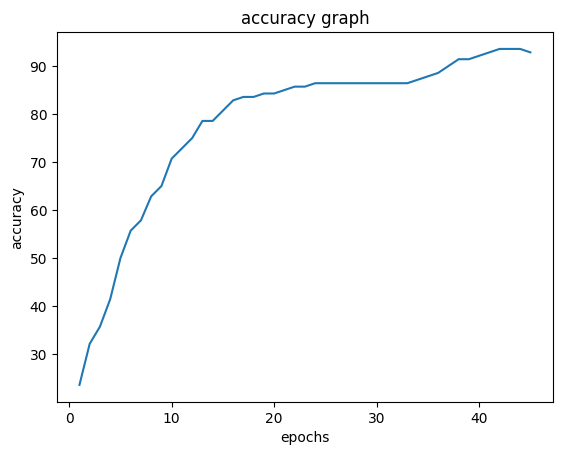

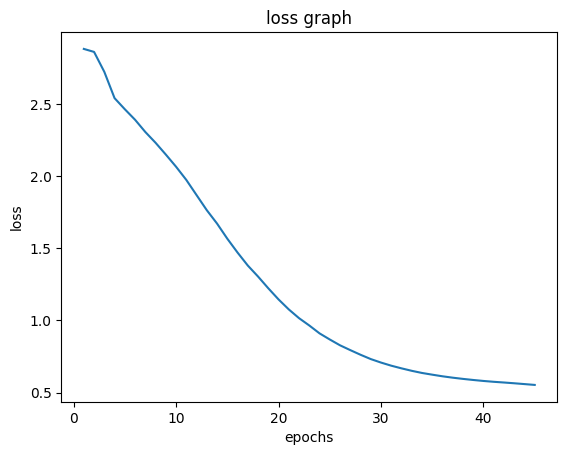

In [16]:
#hyper parameter
input_nodes = 256 # 16 * 16
hidden_nodes = 30
second_hidden_nodes = 10
output_nodes = 7 #t, u, v, w, x, y, z 
learning_rate = 0.002
epochs = 45

main(input_nodes ,hidden_nodes,second_hidden_nodes,output_nodes,learning_rate,epochs)

레이어의 수를 많이 키우면 학습 횟수가 많이 필요하진 않지만  
한 번의 학습을 할 때 시간이 오래 걸리고 또 파이썬 같은 경우에는 c에 비해 속도가 느려 더 느리게 된다.  

레이어의 수를 늘리고 싶을 떄 적절한 하이퍼 파라미터는  
first hidden layer는 60 ~ 80  
second hidden layer는 30 ~ 40  
학습률은 0.001  
학습횟수는 40 ~ 50이고  

레이어의 수를 낮추고 싶을 때 적절한 하이퍼 파라미터는  
레이어를 30 ~ 40 그리고 15 ~ 20으로 내리고  
학습률을 올리거나 학습 횟수를 낮추는 것이다.  

두 방식 다 중요한 것은 오버피팅이 되는 지점을 찾고 그 지점까지 가지 않게끔 본인이 원하는 하이퍼파라미터로 조정하는 것이다.  

레이어의 수를 줄이고 학습률이나 학습횟수를 높이거나  
레이어의 수를 높이고 학습률이나 학습횟수를 줄이는 것은  
본인의 취향에 달린 것 같다.  

오버피팅에 빠지지 않는다면 정확도는 초기 생성되는 가중치 그리고 학습되는 정도에 따라 90 ~ 97에 학습이 완료되는 것을 확인할 수 있었다.